# Import Libraries and Packages

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib

# Load data

In [17]:
df = pd.read_csv("/content/drive/MyDrive/loan_data/loan_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Handle Missing Data

In [18]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [19]:
medianAmount = df['LoanAmount'].median()
df['LoanAmount'] = df['LoanAmount'].fillna(medianAmount)

modeGender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(modeGender)

modeMarried = df['Married'].mode()[0]
df['Married'] = df['Married'].fillna(modeMarried)

modeDependents = df['Dependents'].mode()[0]
df['Dependents'] = df['Dependents'].fillna(modeDependents)

mode_self_employed = df['Self_Employed'].mode()[0]
df['Self_Employed'] = df['Self_Employed'].fillna(mode_self_employed)

mode_loan_amount_term = df['Loan_Amount_Term'].mode()[0]
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(mode_loan_amount_term)

mode_credit_history = df['Credit_History'].mode()[0]
df['Credit_History'] = df['Credit_History'].fillna(mode_credit_history)

In [20]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [21]:
df.duplicated().sum() # zero duplicates

np.int64(0)

# Include Visualization

<Axes: xlabel='Loan_Status', ylabel='count'>

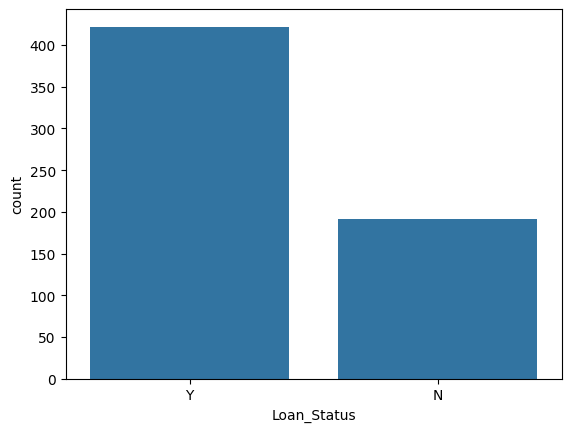

In [22]:
sns.countplot(x='Loan_Status', data=df)

# Encode Categorical Data

In [23]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Feature Selection



In [24]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome'] # add new feature for hyperparameter tuning
df['Debt_Income_Ratio'] = df['LoanAmount'] / df['TotalIncome'] # add new feature for hyperparameter tuning

X = df.drop(['Loan_ID', 'Loan_Status'],axis=1)
y = df['Loan_Status']

# Split Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80:20 Train test split

#Train Model

In [26]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42) # use weighted balance
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#Evaluate Model

In [27]:
print(confusion_matrix(y_test, y_pred))

[[21 22]
 [ 4 76]]


In [28]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7886178861788617


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.78      0.95      0.85        80

    accuracy                           0.79       123
   macro avg       0.81      0.72      0.74       123
weighted avg       0.80      0.79      0.77       123



In [30]:
joblib.dump(rf, 'loan_model.pkl')

['loan_model.pkl']